# Zomato Dataset
#EDA and Restaurant Rating Prediction Model 

In [1]:
#Import libiries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load Zomato.csv File
df=pd.read_csv(r"D:\Datasets\Zomatodataset\zomato.csv",encoding='latin-1')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
#Display Colums Names in the Dataset.
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [4]:
#Display Infomation of the file.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
#Display describe of the file
#df.iloc[:,16:].describe().T   
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Restaurant ID,9551.0,9.051128e+06,8.791521e+06,53.000000,301962.500000,6.004089e+06,1.835229e+07,1.850065e+07
Country Code,9551.0,1.836562e+01,5.675055e+01,1.000000,1.000000,1.000000e+00,1.000000e+00,2.160000e+02
Longitude,9551.0,6.412657e+01,4.146706e+01,-157.948486,77.081343,7.719196e+01,7.728201e+01,1.748321e+02
Latitude,9551.0,2.585438e+01,1.100794e+01,-41.330428,28.478713,2.857047e+01,2.864276e+01,5.597698e+01
Average Cost for two,9551.0,1.199211e+03,1.612118e+04,0.000000,250.000000,4.000000e+02,7.000000e+02,8.000000e+05
Price range,9551.0,1.804837e+00,9.056088e-01,1.000000,1.000000,2.000000e+00,2.000000e+00,4.000000e+00
Aggregate rating,9551.0,2.666370e+00,1.516378e+00,0.000000,2.500000,3.200000e+00,3.700000e+00,4.900000e+00
Votes,9551.0,1.569097e+02,4.301691e+02,0.000000,5.000000,3.100000e+01,1.310000e+02,1.093400e+04


# In Data Analysis What All Things We Do.
1.Missing Values.

2.Explore About the Numerical Variables.

3.Explore About categorical Variables.

4.Finding Relationship between features.

In [6]:
#Renaming the column  
df=df.rename(columns={"Restaurant Name"  :  "Restaurant_Name",
                      "Has Table booking"  :  "Book_table", 
                      "Has Online delivery"  :  "Online_delivery",
                      "Is delivering now"  :  "delivering_now",
                      "Switch to order menu"  :  "Order_menu",
                      "Aggregate rating"  :  "Aggregate_rating"})
                      
df

,Restaurant ID,Restaurant_Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Book_table,Online_delivery,delivering_now,Order_menu,Price range,Aggregate_rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [7]:
#How many rows and columns in the dataset.
df.shape

(9551, 21)

In [8]:
#How many null values in the dataset with rest to column and sum of all null values in the dataset
df.isnull().sum()

Restaurant ID           0
Restaurant_Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Book_table              0
Online_delivery         0
delivering_now          0
Order_menu              0
Price range             0
Aggregate_rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [9]:
#Display the 
#[features for features in df.columns if df[features].isnull().sum()>0]
[[features,df[features].isnull().sum()] for features in df.columns if df[features].isnull().sum()>0]

[['Cuisines', 9]]

<AxesSubplot:>

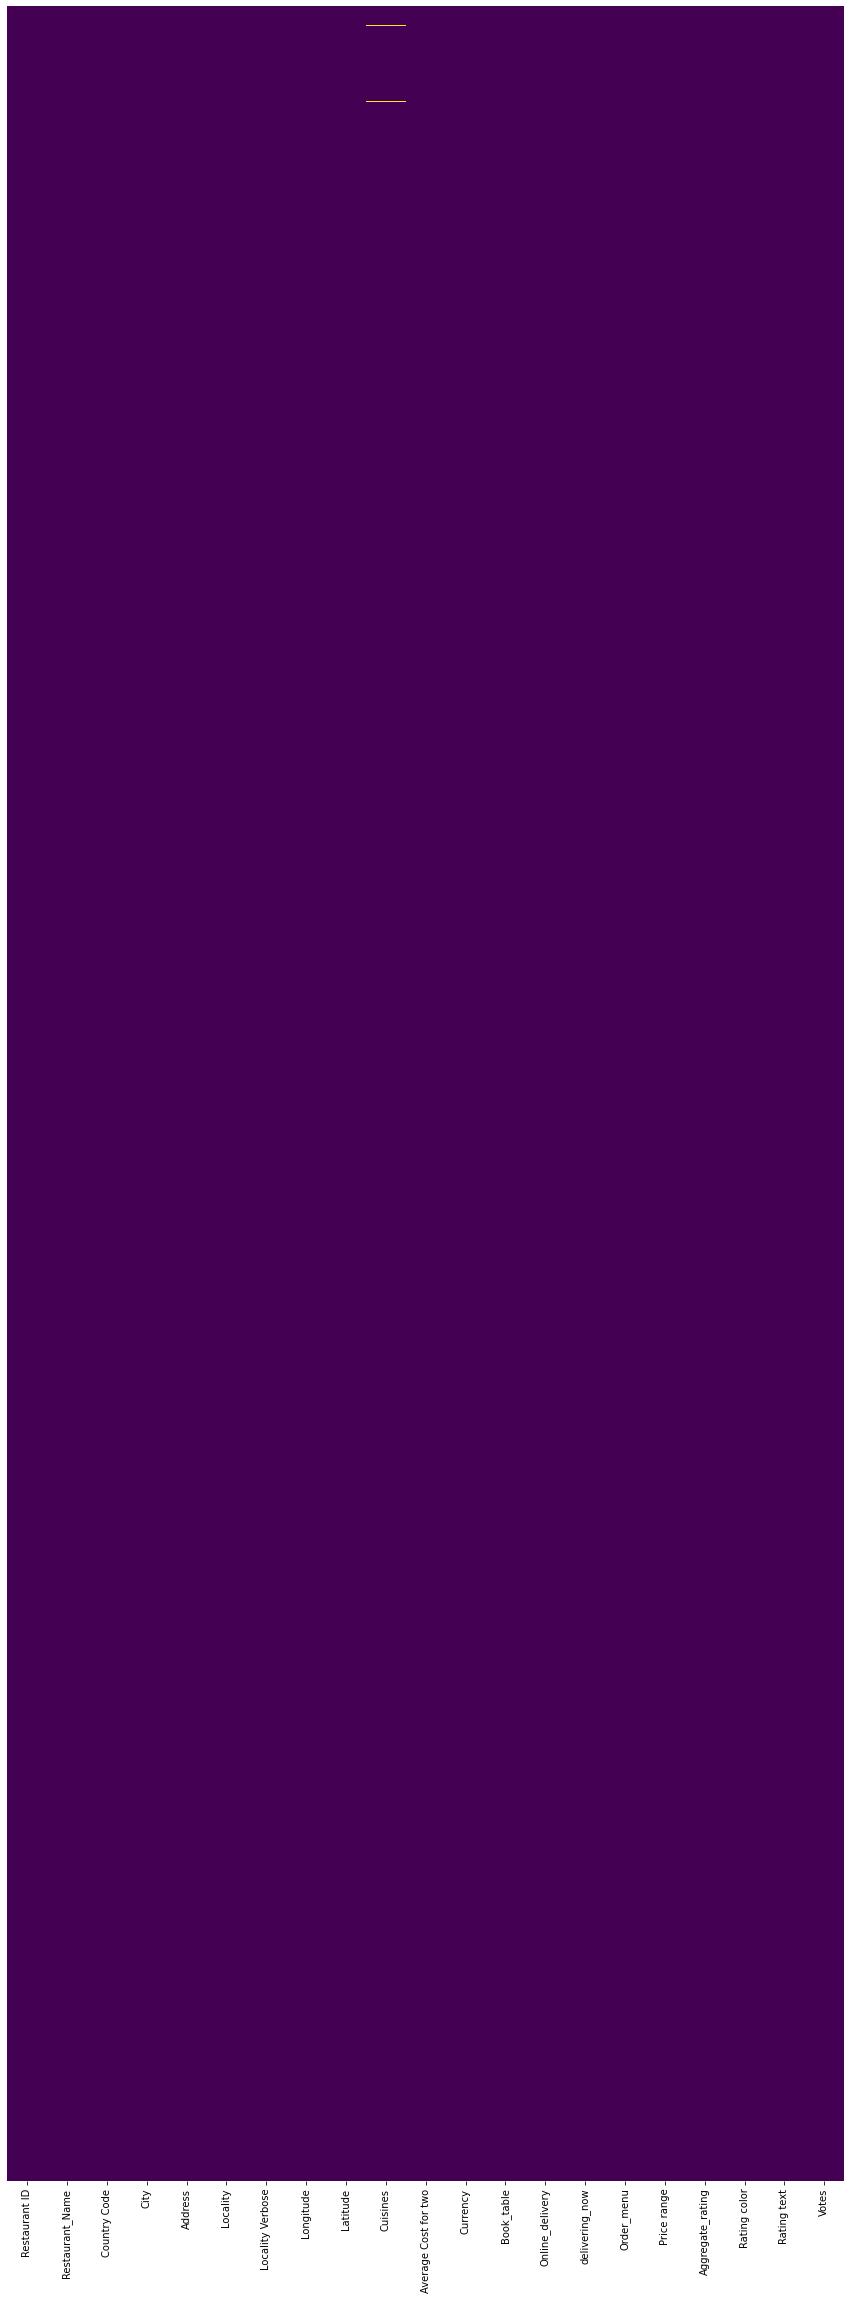

In [10]:
##
plt.figure(figsize=(15,40))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
df_country=pd.read_excel(r"D:\Datasets\Zomatodataset\Country-Code.xlsx")
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [12]:
df.columns

Index(['Restaurant ID', 'Restaurant_Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Book_table', 'Online_delivery',
       'delivering_now', 'Order_menu', 'Price range', 'Aggregate_rating',
       'Rating color', 'Rating text', 'Votes'],
      dtype='object')

In [13]:
#Merge Country dataset into Zomato dataset
final_df=pd.merge(df,df_country,on='Country Code', how='left')
final_df.head()

,Restaurant ID,Restaurant_Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Book_table,Online_delivery,delivering_now,Order_menu,Price range,Aggregate_rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [14]:
final_df.columns

Index(['Restaurant ID', 'Restaurant_Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Book_table', 'Online_delivery',
       'delivering_now', 'Order_menu', 'Price range', 'Aggregate_rating',
       'Rating color', 'Rating text', 'Votes', 'Country'],
      dtype='object')

In [15]:
df.isnull().sum()

Restaurant ID           0
Restaurant_Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Book_table              0
Online_delivery         0
delivering_now          0
Order_menu              0
Price range             0
Aggregate_rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [16]:
##To check Data Types
final_df.dtypes

Restaurant ID             int64
Restaurant_Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Book_table               object
Online_delivery          object
delivering_now           object
Order_menu               object
Price range               int64
Aggregate_rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

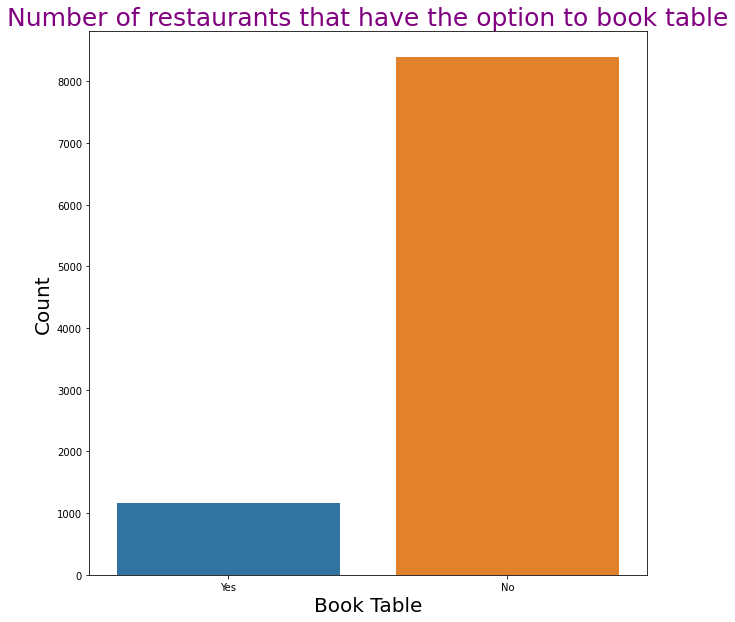

In [17]:
plt.figure(figsize=(10,10))

sns.countplot(df['Book_table'])
plt.title("Number of restaurants that have the option to book table",fontsize=25,color='purple')
plt.ylabel("Count",fontsize=20)
plt.xlabel("Book Table",fontsize=20)
plt.show()

In [52]:
Booked = final_df.groupby('Book_table')['Book_table'].count()[1]
Booked

1158

In [53]:
not_Booked = final_df.groupby('Book_table')['Book_table'].count()[0]
not_Booked

8393

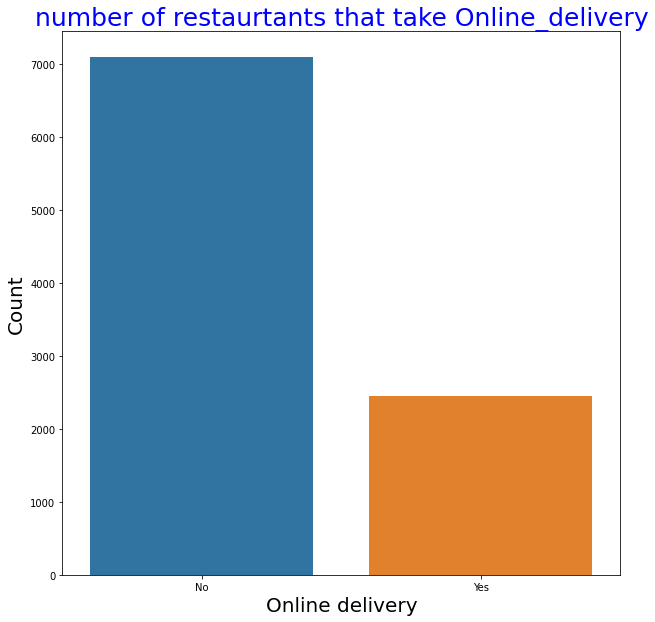

In [18]:
plt.figure(figsize=(10,10))

sns.countplot(df['Online_delivery'])
plt.title("number of restaurtants that take Online_delivery",fontsize=25,color='blue')
plt.ylabel("Count",fontsize=20)
plt.xlabel("Online delivery",fontsize=20)
plt.show()

In [19]:
#To check index value 
country_names=final_df.Country.value_counts().index
country_names

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE',
       'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada'],
      dtype='object')

In [20]:
#
country_val=final_df.Country.value_counts().values
country_val

array([8652,  434,   80,   60,   60,   60,   40,   34,   24,   22,   21,
         20,   20,   20,    4], dtype=int64)

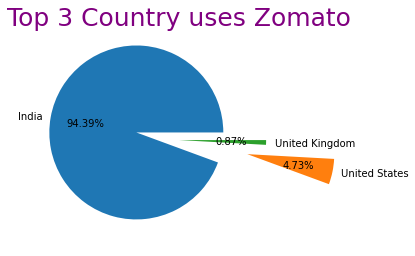

In [21]:
## Pie Chart- Top 3 countries that uses zomato

explode=(0.5,0.8,0)
plt.pie(country_val[:3],labels=country_names[:3],autopct='%1.2f%%',explode=explode)
plt.title("Top 3 Country uses Zomato",fontsize=25,color='purple')
plt.show()

# Observation:
Zomato maximum records or transaction are from India After that USA and then United Kingdoms

In [22]:
ratings=final_df.groupby(['Aggregate_rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})
ratings

,Aggregate_rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


# Observation

When Rating is between 4.5 to 4.9---> Excellent

When Rating are between 4.0 to 3.4--->very good

when Rating is between 3.5 to 3.9----> good

when Rating is between 3.0 to 3.4----> average

when Rating is between 2.5 to 2.9----> average

when Rating is between 2.0 to 2.4----> Poor

In [23]:
#
ratings.head()

,Aggregate_rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15


<AxesSubplot:xlabel='Aggregate_rating', ylabel='Rating Count'>

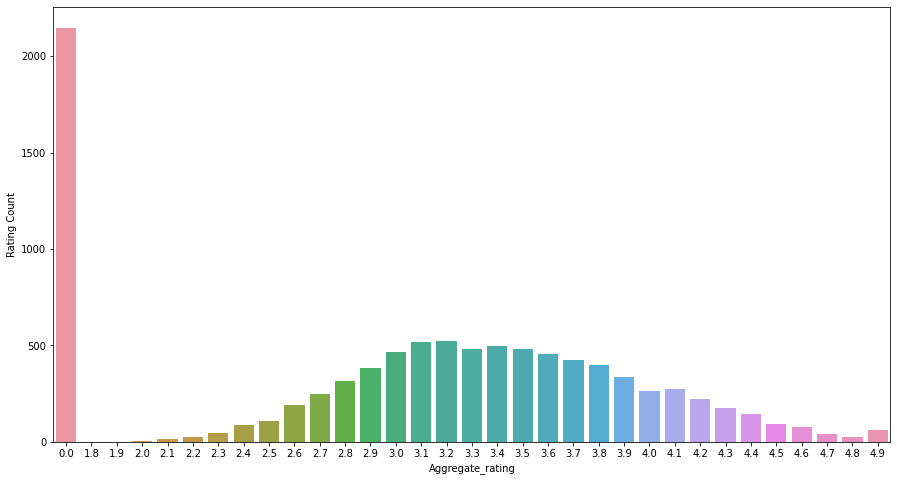

In [24]:
#
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15, 8)
sns.barplot(x="Aggregate_rating",y="Rating Count",data=ratings)

<AxesSubplot:xlabel='Aggregate_rating', ylabel='Rating Count'>

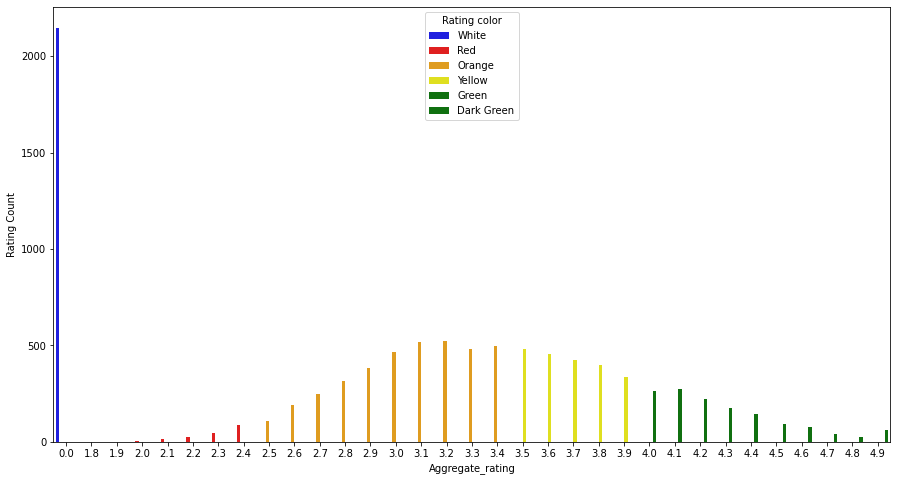

In [25]:
sns.barplot(x="Aggregate_rating",y="Rating Count",hue='Rating color',data=ratings,palette=['blue','red','orange','yellow','green','green'])

# Observation:

1.Not Rated count is very high

2.Maximum number of rating are between 2.5 to 3.4

<AxesSubplot:xlabel='Rating color', ylabel='count'>

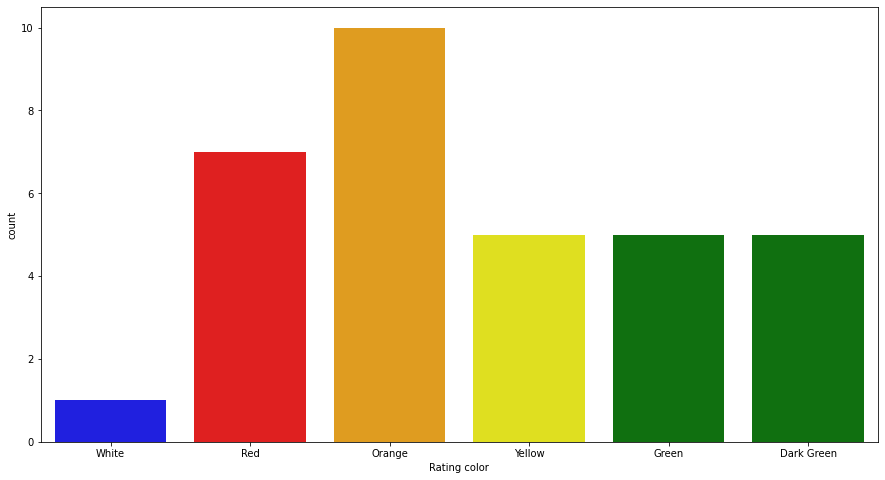

In [26]:
## Count plot
sns.countplot(x="Rating color",data=ratings,palette=['blue','red','orange','yellow','green','green'])

In [27]:
ratings

,Aggregate_rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


In [28]:
#Find the countries name that has given 0 rating 
final_df[final_df['Rating color']=='White'].groupby('Country').size().reset_index()

,Country,0
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


In [29]:
final_df.groupby(['Aggregate_rating','Country']).size().reset_index().head(5)

,Aggregate_rating,Country,0
0,0.0,Brazil,5
1,0.0,India,2139
2,0.0,United Kingdom,1
3,0.0,United States,3
4,1.8,India,1


In [30]:
##find out which currency is used by which country?
final_df.columns

Index(['Restaurant ID', 'Restaurant_Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Book_table', 'Online_delivery',
       'delivering_now', 'Order_menu', 'Price range', 'Aggregate_rating',
       'Rating color', 'Rating text', 'Votes', 'Country'],
      dtype='object')

In [31]:
final_df[['Country','Currency']].groupby(['Country','Currency']).size().reset_index()

,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


In [32]:
## Which Countries do have online deliveries option
final_df[final_df['Online_delivery'] =="Yes"].Country.value_counts()

India    2423
UAE        28
Name: Country, dtype: int64

In [33]:
final_df[['Online_delivery','Country']].groupby(['Online_delivery','Country']).size().reset_index()

,Online_delivery,Country,0
0,No,Australia,24
1,No,Brazil,60
2,No,Canada,4
3,No,India,6229
4,No,Indonesia,21
5,No,New Zealand,40
6,No,Phillipines,22
7,No,Qatar,20
8,No,Singapore,20
9,No,South Africa,60


# Observations:

1.Online Deliveries are available in India and UAE

In [34]:
## Create a pie chart for top 5 cities distribution
final_df.City.value_counts().index

Index(['New Delhi', 'Gurgaon', 'Noida', 'Faridabad', 'Ghaziabad',
       'Bhubaneshwar', 'Amritsar', 'Ahmedabad', 'Lucknow', 'Guwahati',
       ...
       'Ojo Caliente', 'Montville', 'Monroe', 'Miller', 'Middleton Beach',
       'Panchkula', 'Mc Millan', 'Mayfield', 'Macedon', 'Vineland Station'],
      dtype='object', length=141)

In [35]:
city_values=final_df.City.value_counts().values
city_labels=final_df.City.value_counts().index

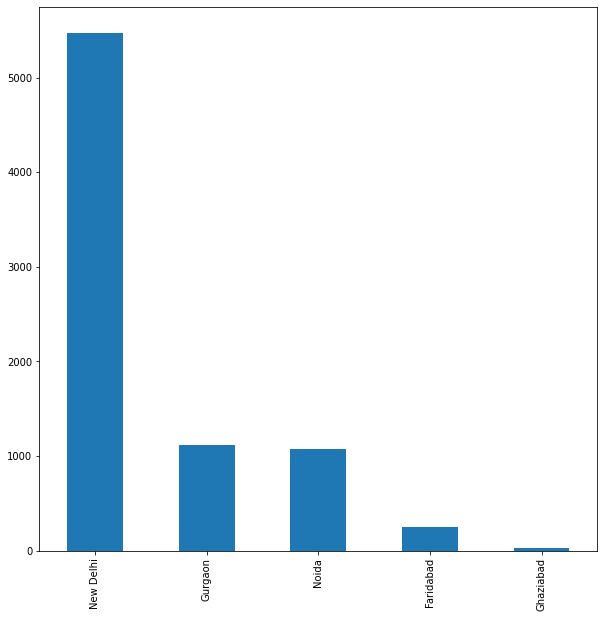

In [36]:

plt.figure(figsize=(10,10))
ax=df.City.value_counts()[:5]
ax.plot(kind='bar')
plt.show()

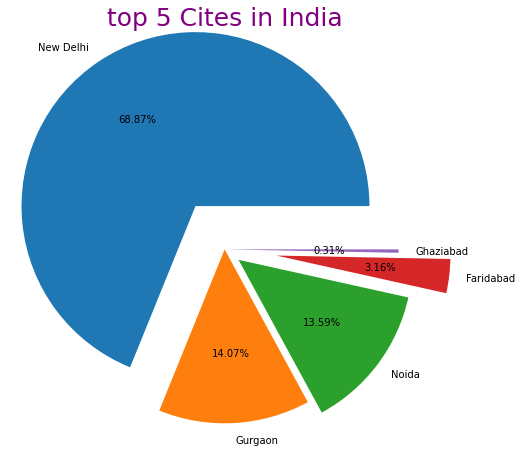

In [37]:
#
explode=(0.3,0,0.1,0.3,0)
plt.pie(city_values[:5],labels=city_labels[:5],autopct='%1.2f%%',explode=explode)
plt.title("top 5 Cites in India",fontsize=25,color='purple')
plt.show()

In [38]:
#Find the top 10 cuisines
final_df.Cuisines.value_counts().index

Index(['North Indian', 'North Indian, Chinese', 'Chinese', 'Fast Food',
       'North Indian, Mughlai', 'Cafe', 'Bakery',
       'North Indian, Mughlai, Chinese', 'Bakery, Desserts', 'Street Food',
       ...
       'Cafe, Pizza, Burger',
       'Healthy Food, Continental, Juices, Beverages, Italian, Salad, Lebanese',
       'Goan, American, Portuguese', 'South Indian, Desserts, Beverages',
       'Healthy Food, North Indian, Italian, Salad', 'Bengali, Fast Food',
       'North Indian, Rajasthani, Asian',
       'Chinese, Thai, Malaysian, Indonesian',
       'Bakery, Desserts, North Indian, Bengali, South Indian',
       'Italian, World Cuisine'],
      dtype='object', length=1825)

In [39]:
#Indefying cuisies
cuisines_values=final_df.Cuisines.value_counts().values
cuisines_labels=final_df.Cuisines.value_counts().index

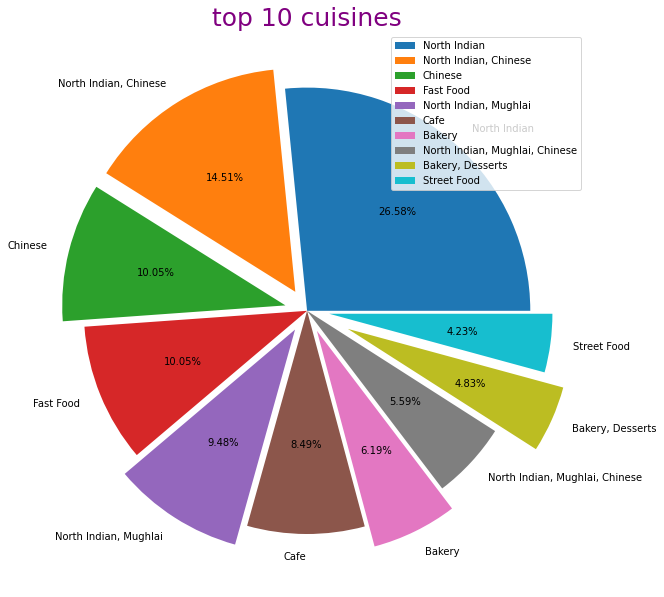

In [40]:
#Pie Plot
plt.figure(figsize=(10,35))
explode=(0,0.1,0.1,0,0.1,0,0.1,0,0.2,0.1)
plt.pie(cuisines_values[:10],labels=cuisines_labels[:10],autopct='%1.2f%%',explode=explode)
plt.title("top 10 cuisines",fontsize=25,color='purple')
plt.legend()
plt.show()

# Converting the binary nominal variable to numeric using 1/0 mapping

In [41]:
# Converting the binary nominal variable sex to numeric
columns = ['Book_table','Online_delivery','delivering_now','Order_menu']

for col in columns:
    final_df[col].replace({'Yes':1, 'No':0}, inplace=True)

#df[columns].replace({'Yes':1, 'No':0}, inplace=True)    

In [42]:
final_df.head(1)

,Restaurant ID,Restaurant_Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Book_table,Online_delivery,delivering_now,Order_menu,Price range,Aggregate_rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,1,0,0,0,3,4.8,Dark Green,Excellent,314,Phillipines


# Machine Learning: Splitting the data into Training and Testing sample
We don't use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [43]:
# Separate Target Variable and Predictor Variables
TargetVariable='Aggregate_rating'
Predictors=['Votes', 'Average Cost for two', 'Book_table',
           'Online_delivery', 'Price range']

X=final_df[Predictors].values
y=final_df[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)


# Standardization/Normalization of data
You can choose not to run this step if you want to compare the resultant accuracy of this transformation with the accuracy of raw data.



In [44]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMax normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6685, 5)
(6685,)
(2866, 5)
(2866,)


# Decision Trees

In [47]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=6,criterion='squared_error')
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
print("MAE: ",metrics.mean_absolute_error(y_test,prediction))
print("MSE: ",metrics.mean_squared_error(y_test,prediction))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,prediction)))
print("R2: ", metrics.r2_score(y_test,prediction))

DecisionTreeRegressor(max_depth=6)
MAE:  0.22734094652921316
MSE:  0.12178196512890448
RMSE:  0.34897272834550336
R2:  0.9461804703163377


# Support Vector Machines(SVM)

In [48]:
# Support Vector Machines(SVM)
from sklearn import svm
RegModel = svm.SVR(C=5, kernel='rbf', degree=20, gamma=0.01)

# Printing all the parameters
print(RegModel)

# Creating the model on Training Data
SVM=RegModel.fit(X_train,y_train)
prediction=SVM.predict(X_test)

from sklearn import metrics
print("MAE: ",metrics.mean_absolute_error(y_test,prediction))
print("MSE: ",metrics.mean_squared_error(y_test,prediction))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,prediction)))
print("R2: ", metrics.r2_score(y_test,prediction))

SVR(C=5, degree=20, gamma=0.01)
MAE:  0.9618643825053288
MSE:  2.0624049968367473
RMSE:  1.4361075853976775
R2:  0.08855414814911677


# Random Forest

In [49]:
# Random Forest 
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=2, n_estimators=400,criterion='squared_error')

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
print("MAE: ",metrics.mean_absolute_error(y_test,prediction))
print("MSE: ",metrics.mean_squared_error(y_test,prediction))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,prediction)))
print("R2: ", metrics.r2_score(y_test,prediction))

RandomForestRegressor(max_depth=2, n_estimators=400)
MAE:  0.2689186370793681
MSE:  0.16139270625745702
RMSE:  0.40173711087906355
R2:  0.9286751569827625
